In [3]:
import tensorflow as tf

In [4]:
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import random

In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

In [8]:
import keras
model=Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))


In [16]:
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
          

In [17]:
model.compile(optimizer="sgd",loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [18]:
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1293 - accuracy: 0.9005 - val_loss: 0.3585 - val_accuracy: 0.9508
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9553 - val_loss: 0.2098 - val_accuracy: 0.9541
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1779 - accuracy: 0.9592 - val_loss: 0.1813 - val_accuracy: 0.9573
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1534 - accuracy: 0.9632 - val_loss: 0.1622 - val_accuracy: 0.9603
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1373 - accuracy: 0.9669 - val_loss: 0.1518 - val_accuracy: 0.9618
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9696 - val_loss: 0.1447 - val_accuracy: 0.9635
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1140 - accuracy: 0.9725 - val_loss: 0.1343 - val_accuracy:

In [12]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.4f"%test_loss)
print("Accuracy=%4f"%test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.9513
Loss=0.1737
Accuracy=0.951300


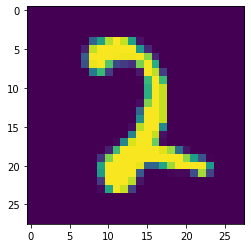

In [19]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()


In [20]:
prediction=model.predict(x_test)
print("The handwritten number in the image is %d"%np.argmax(prediction[n]))

313/313 [==============================] - 0s 1ms/step
The handwritten number in the image is 2


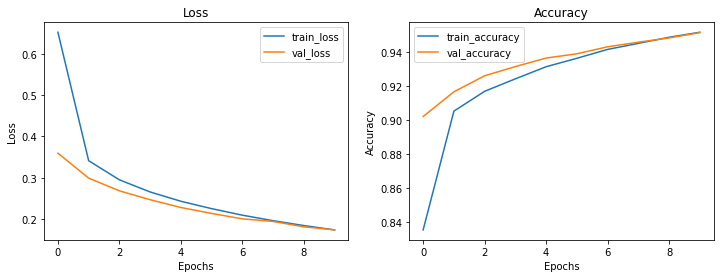

In [15]:
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(H.history['loss'], label='train_loss')
plt.plot(H.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(H.history['accuracy'], label='train_accuracy')
plt.plot(H.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

